In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn import metrics
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.neural_network import MLPClassifier
# import pandas_profiling as pp
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

In [3]:
df=pd.read_csv(r"D:\Datasets\Train_test_iot\Train_Test_IoT_Weather.csv")

# profile = pp.ProfileReport(df)
# profile.to_file("output.html")

FileNotFoundError: [Errno 2] No such file or directory: 'D:\\Datasets\\Train_test_iot\\Train_Test_IoT_Weather.csv'

In [3]:
df.drop(['ts','date','time','type'],axis=1,inplace=True)

In [4]:
x=df.loc[:,['temperature','pressure','humidity']] # input
y=df.loc[:,['label']] # target

# splitting thee dataset into training and testing sets
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.30)

In [5]:
gnb=GaussianNB()
model=gnb.fit(x_train,y_train.values.ravel())
y_pred=model.predict(x_test)

print("Accuracy: ",accuracy_score(y_test,y_pred))
#print([y_test, y_pred])

#print("Precision: ",precision_score(y_test,y_pred,average='weighted'))
print("Recall: ",recall_score(y_test,y_pred,average='weighted'))
print("F1score: ",f1_score(y_test,y_pred,average='weighted'))

gprecision, grecall, thresholds = precision_recall_curve(y_test, y_pred)

# fig, ax = plt.subplots()
# ax.plot(recall, precision, color='purple')

# #add axis labels to plot
# ax.set_title('Precision-Recall Curve')
# ax.set_ylabel('Precision')
# ax.set_xlabel('Recall')

# #display plot
# # plt.show()
# plt.savefig('weather_guassian.jpg', bbox_inches='tight', facecolor='white')

Accuracy:  0.709753628079649
Recall:  0.709753628079649
F1score:  0.682764119138969


In [6]:
mnb=MultinomialNB()
mnb.fit(x_train,y_train.values.ravel())
y_pred=mnb.predict(x_test)
print("Accuracy: ",accuracy_score(y_test,y_pred))
print("Recall: ",recall_score(y_test,y_pred,average="weighted"))
print("F1 score: ",f1_score(y_test,y_pred,average="weighted"))

precision, recall, thresholds = precision_recall_curve(y_test, y_pred)

fig, ax = plt.subplots()
ax.plot(recall, precision, color='purple')

#add axis labels to plot
ax.set_title('Precision-Recall Curve')
ax.set_ylabel('Precision')
ax.set_xlabel('Recall')

#display plot
plt.show()

ValueError: Negative values in data passed to MultinomialNB (input X)

In [5]:
rfc=RandomForestClassifier(n_estimators=100, random_state=42, max_depth=10)
rfc.fit(x_train,y_train.values.ravel())
# y_pred=rfc.predict(x_test)
# # print(y_test)
# # print(y_pred)
# print("Accuracy: ",accuracy_score(y_test,y_pred))
# #print("Precision: ",precision_score(y_test,y_pred,average='weighted'))
# print("Recall: ",recall_score(y_test,y_pred,average='weighted'))
# print("F1score: ",f1_score(y_test,y_pred,average='weighted'))

# rprecision, rrecall, thresholds = precision_recall_curve(y_test, y_pred)

y_pred_random=rfc.predict(x_test)
y_score_random = rfc.predict_proba(x_test)[:, 1]

# # fig, ax = plt.subplots()
# # ax.plot(recall, precision, color='purple')

# # #add axis labels to plot
# # ax.set_title('Precision-Recall Curve')
# # ax.set_ylabel('Precision')
# # ax.set_xlabel('Recall')

# # #display plot
# # # plt.show()
# # plt.savefig('weather_random.jpg', bbox_inches='tight', facecolor='white')

In [6]:
xgb_classifier=xgb.XGBClassifier(n_estimators=100, random_state=42, max_depth=10)
xgb_classifier.fit(x_train,y_train.values.ravel())
# y_pred=xgb_classifier.predict(x_test)

# print("Accuracy: ",accuracy_score(y_test,y_pred))
# #print("Precision: ",precision_score(y_test,y_pred,average='weighted'))
# print("Recall: ",recall_score(y_test,y_pred,average='weighted'))
# print("F1score: ",f1_score(y_test,y_pred,average='weighted'))

# xprecision, xrecall, thresholds = precision_recall_curve(y_test, y_pred)

y_pred_xgb=xgb_classifier.predict(x_test)
y_score_xgb = xgb_classifier.predict_proba(x_test)[:, 1]

# # fig, ax = plt.subplots()
# # ax.plot(recall, precision, color='purple')

# # #add axis labels to plot
# # ax.set_title('Precision-Recall Curve')
# # ax.set_ylabel('Precision')
# # ax.set_xlabel('Recall')

# # #display plot
# # # plt.show()
# # plt.savefig('weather_xgb.jpg', bbox_inches='tight', facecolor='white')

In [7]:
model = MLPClassifier(max_iter=100, random_state=42)
model.fit(x_train, y_train.values.ravel())
# y_pred=model.predict(x_test)

# print("Accuracy: ",accuracy_score(y_test,y_pred))
# #print("Precision: ",precision_score(y_test,y_pred,average='weighted'))
# print("Recall: ",recall_score(y_test,y_pred,average='weighted'))
# print("F1score: ",f1_score(y_test,y_pred,average='weighted'))

# mlprecision, mlrecall, thresholds = precision_recall_curve(y_test, y_pred)

y_pred_mlp=model.predict(x_test)
y_score_mlp= model.predict_proba(x_test)[:, 1]

# # fig, ax = plt.subplots()
# # ax.plot(recall, precision, color='purple')

# # #add axis labels to plot
# # ax.set_title('Precision-Recall Curve')
# # ax.set_ylabel('Precision')
# # ax.set_xlabel('Recall')

# # #display plot
# # # plt.show()
# # plt.savefig('weather_mlp.jpg', bbox_inches='tight', facecolor='white')

C:\Users\bindu\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


In [8]:
abc = AdaBoostClassifier(n_estimators=100, learning_rate=1, random_state=42)
# Train Adaboost Classifer
abc.fit(x_train, y_train.values.ravel())
#Predict the response for test dataset
# y_pred = model1.predict(x_test)

# print("Accuracy: ",accuracy_score(y_test,y_pred))
# #print("Precision: ",precision_score(y_test,y_pred,average='weighted'))
# print("Recall: ",recall_score(y_test,y_pred,average='weighted'))
# print("F1score: ",f1_score(y_test,y_pred,average='weighted'))

y_pred_abc=abc.predict(x_test)
y_score_abc = abc.predict_proba(x_test)[:, 1]

# aprecision, arecall, thresholds = precision_recall_curve(y_test, y_pred)

# # fig, ax = plt.subplots()
# # ax.plot(recall, precision, color='purple')

# # #add axis labels to plot
# # ax.set_title('Precision-Recall Curve')
# # ax.set_ylabel('Precision')
# # ax.set_xlabel('Recall')

# # #display plot
# # # plt.show()
# # plt.savefig('weather_adaboost.jpg', bbox_inches='tight', facecolor='white')

In [9]:
clf=DecisionTreeClassifier()
#Training a Decision Tree Classifer
clf.fit(x_train,y_train.values.ravel())
#Predicting the response for test dataset
# y_pred=clf.predict(x_test)
# # splitting thee dataset into training and testing sets
# dprecision, drecall, thresholds = precision_recall_curve(y_test, y_pred)
y_pred_decision=clf.predict(x_test)
y_score_decision = clf.predict_proba(x_test)[:, 1]

In [10]:
classifier = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2 )
classifier.fit(x_train,y_train.values.ravel())
# y_pred=classifier.predict(x_test)
# kprecision, krecall, thresholds = precision_recall_curve(y_test, y_pred)
y_pred_knn=classifier.predict(x_test)
y_score_knn = classifier.predict_proba(x_test)[:, 1]

In [12]:
clf=QuadraticDiscriminantAnalysis()
clf.fit(x_train,y_train.values.ravel())
y_pred=clf.predict(x_test)
qprecision, qrecall, thresholds = precision_recall_curve(y_test, y_pred)

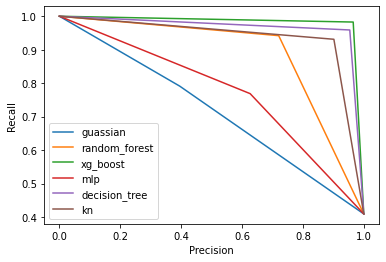

In [11]:
plt.xlabel("Precision")
plt.ylabel("Recall")
plt.plot(grecall,gprecision,label='guassian')
plt.plot(rrecall,rprecision,label='random_forest')
plt.plot(xrecall,xprecision,label='xg_boost')
plt.plot(mlrecall,mlprecision,label='mlp')
# plt.plot(arecall,aprecision,label='ada_boost')
plt.plot(drecall,dprecision,label='decision_tree')
plt.plot(krecall,kprecision,label='kn')
# plt.plot(qrecall,qprecision,label='quadratic')
plt.legend()
plt.show()

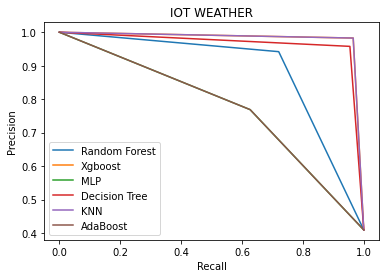

In [11]:
precision1, recall1, _ = precision_recall_curve(y_test, y_pred_random)
precision2, recall2, _ = precision_recall_curve(y_test, y_pred_xgb)
precision3, recall3, _ = precision_recall_curve(y_test, y_pred_mlp)
precision4, recall4, _ = precision_recall_curve(y_test, y_pred_decision)
precision5, recall5, _ = precision_recall_curve(y_test, y_pred_knn)
precision6, recall6, _ = precision_recall_curve(y_test, y_pred_abc)

plt.plot(recall1, precision1, label='Random Forest')
plt.plot(recall2, precision2, label='Xgboost')
plt.plot(recall3, precision3, label='MLP')
plt.plot(recall4, precision4, label='Decision Tree')
plt.plot(recall2, precision2, label='KNN')
plt.plot(recall3, precision3, label='AdaBoost')
plt.title("IOT WEATHER")
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()
plt.show()

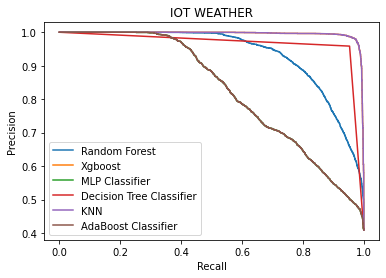

In [12]:
precision1, recall1, _ = precision_recall_curve(y_test, y_score_random)
precision2, recall2, _ = precision_recall_curve(y_test, y_score_xgb)
precision3, recall3, _ = precision_recall_curve(y_test, y_score_mlp)
precision4, recall4, _ = precision_recall_curve(y_test, y_score_decision)
precision5, recall5, _ = precision_recall_curve(y_test, y_score_knn)
precision6, recall6, _ = precision_recall_curve(y_test, y_score_abc)

plt.plot(recall1, precision1, label='Random Forest')
plt.plot(recall2, precision2, label='Xgboost')
plt.plot(recall3, precision3, label='MLP Classifier')
plt.plot(recall4, precision4, label='Decision Tree Classifier')
plt.plot(recall2, precision2, label='KNN')
plt.plot(recall3, precision3, label='AdaBoost Classifier')
plt.title("IOT WEATHER")
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()
plt.show()